In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/My Drive/Colab Notebooks/FastAI/Personal Challenges/COMPUTER VISION/Plant Village/PlantVillage"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [0]:
data = (ImageList.from_folder(path).split_by_rand_pct().label_from_folder().transform(tfms, size=224).databunch())

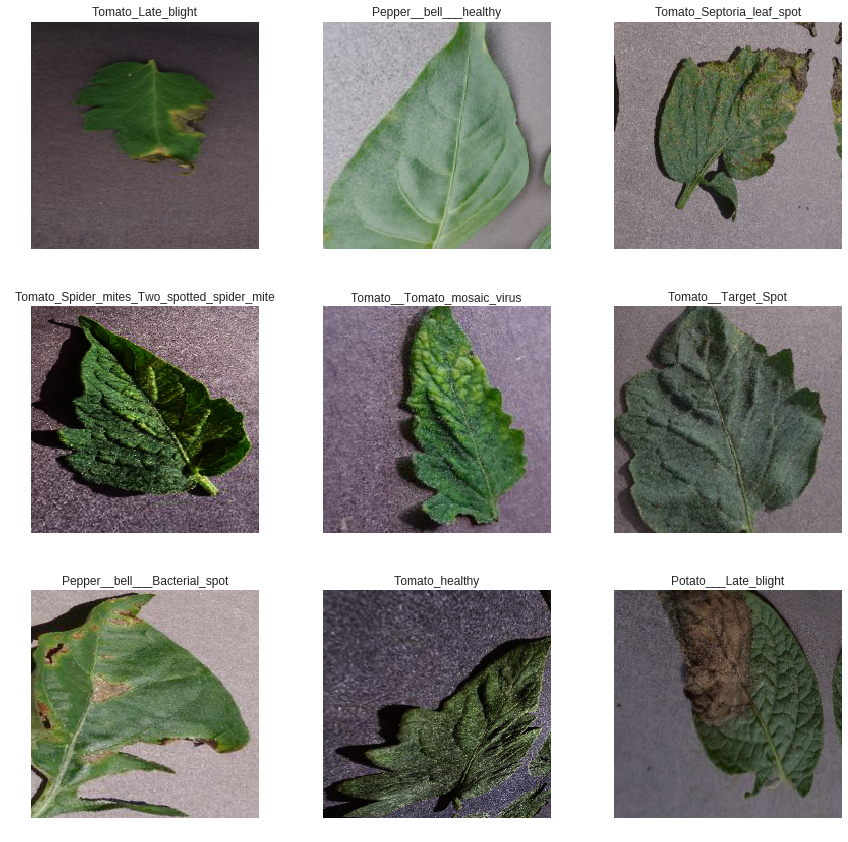

In [0]:
data.show_batch(rows=3, figsize=(12, 12))

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 81013847.92it/s]


In [0]:
print(data.classes)
len(data.classes), data.c

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


(14, 14)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-02


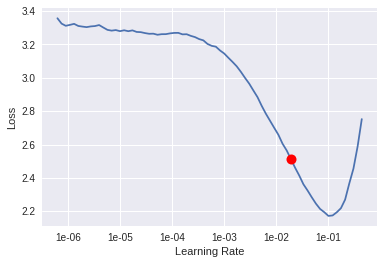

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.440396,0.276398,0.910679
2,0.334051,0.303748,0.905239
3,0.191092,0.123099,0.960492
4,0.126287,0.038957,0.987976
5,0.078944,0.029792,0.991698


In [0]:
learn.save(path + 'plant')

In [0]:
learn.load(path + 'plant')

Learner(data=ImageDataBunch;

Train: LabelList (13975 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato__Tomato_mosaic_virus,Tomato__Tomato_mosaic_virus,Tomato__Tomato_mosaic_virus,Tomato__Tomato_mosaic_virus,Tomato__Tomato_mosaic_virus
Path: /content/gdrive/My Drive/Colab Notebooks/FastAI/Personal Challenges/COMPUTER VISION/Plant Village/PlantVillage;

Valid: LabelList (3493 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato_Late_blight,Tomato_Bacterial_spot,Potato___Early_blight,Tomato_Septoria_leaf_spot,Pepper__bell___Bacterial_spot
Path: /content/gdrive/My Drive/Colab Notebooks/FastAI/Personal Challenges/COMPUTER VISION/Plant Village/PlantVillage;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): Ba

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

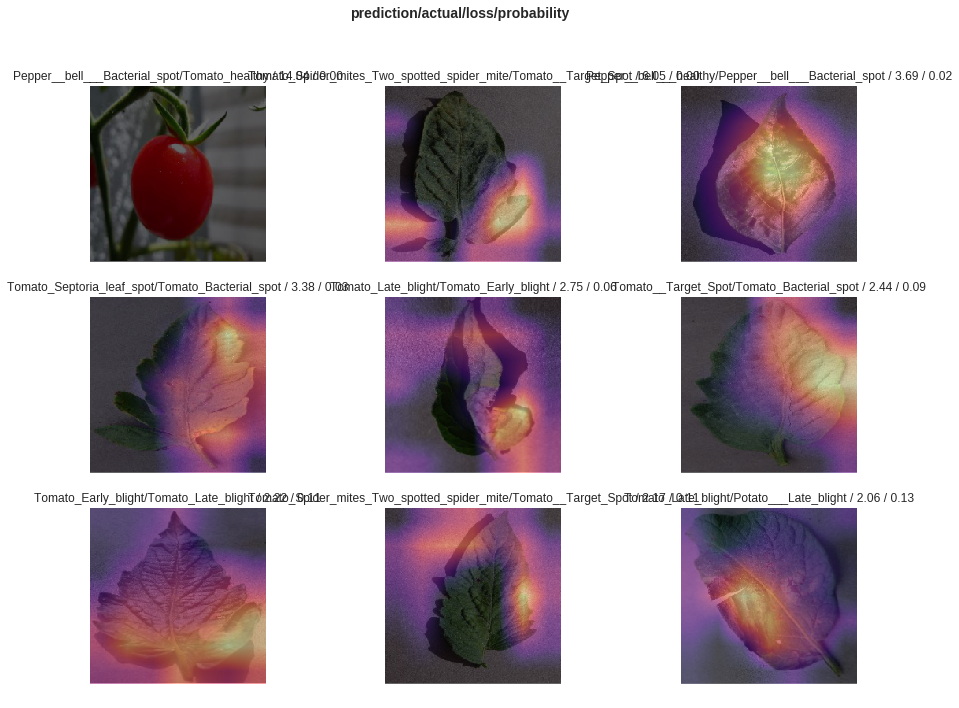

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=2)

[('Tomato__Target_Spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 5),
 ('Tomato_Bacterial_spot', 'Tomato__Target_Spot', 4),
 ('Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 3)]

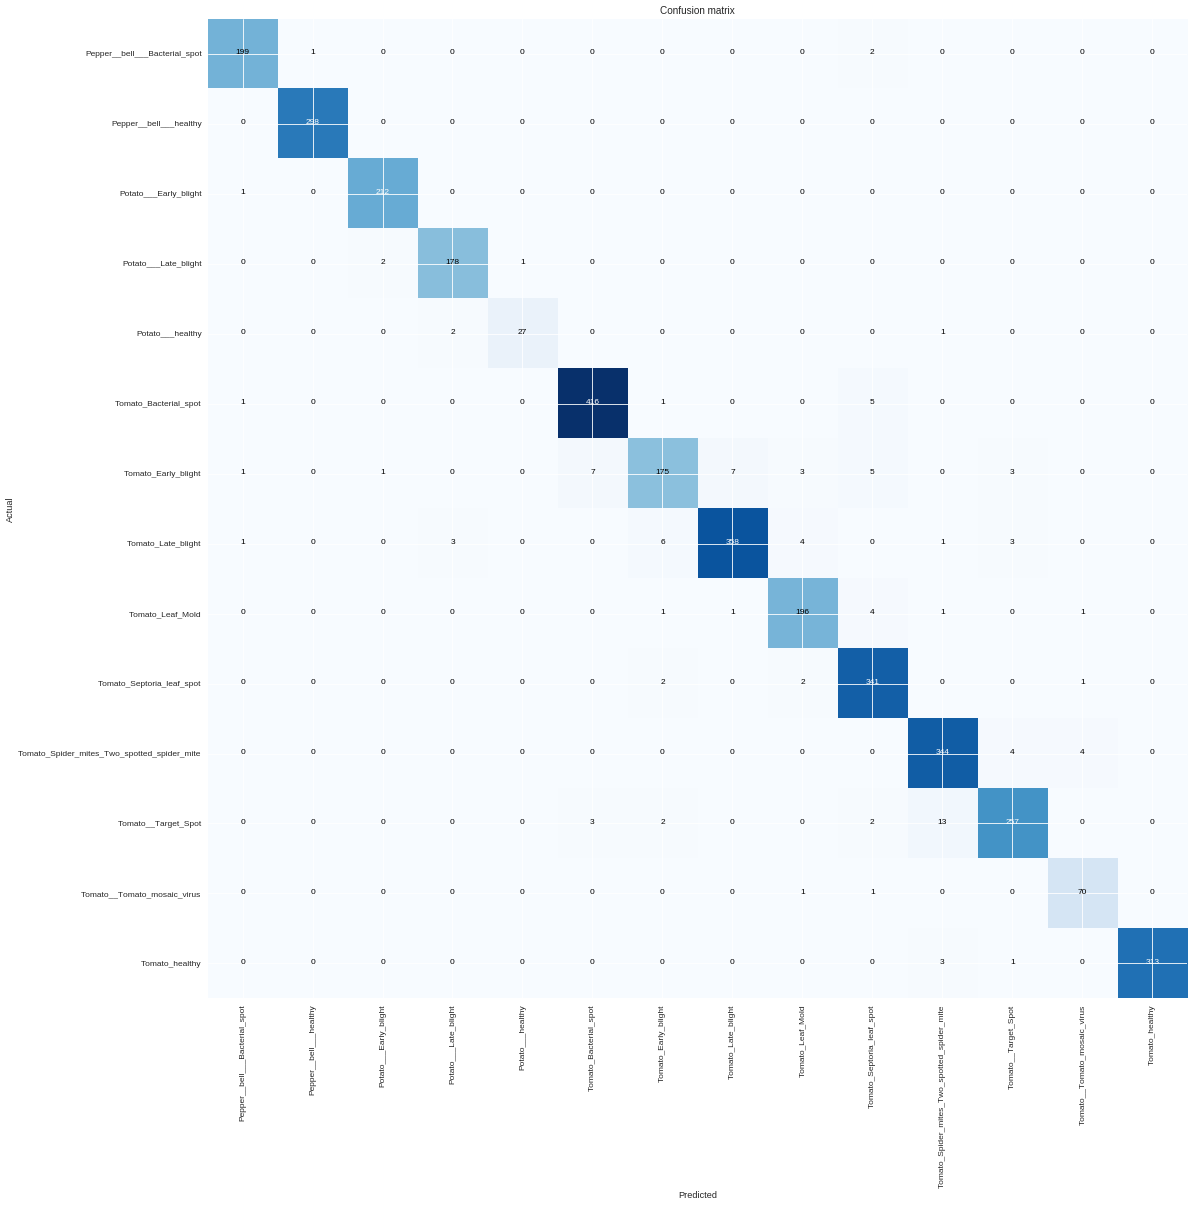

In [0]:
interp.plot_confusion_matrix(figsize=(20, 20), dpi=60)